# Multi-modal generation pipeline
## Image, Captions, and a Video
In this notebook you will learn how to using Stable Diffusion via LangChain to generate an image, a caption for your choice of `llm`, and finally generate a video based on a generated "*improved prompt*".

## Get Started
**Installation**:

In [9]:
%pip install -Uq gradio_tools langchain pillow openai

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
from gradio_tools.tools import (
    ImageCaptioningTool,
    StableDiffusionPromptGeneratorTool,
    StableDiffusionTool,
    TextToVideoTool,
)
from langchain.agents import AgentType, Tool, initialize_agent
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from PIL import Image
from IPython.display import display

### StableDiffusionTool()
First, let's test the image generation capabilities.

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔

Job Status: Status.STARTING eta: None


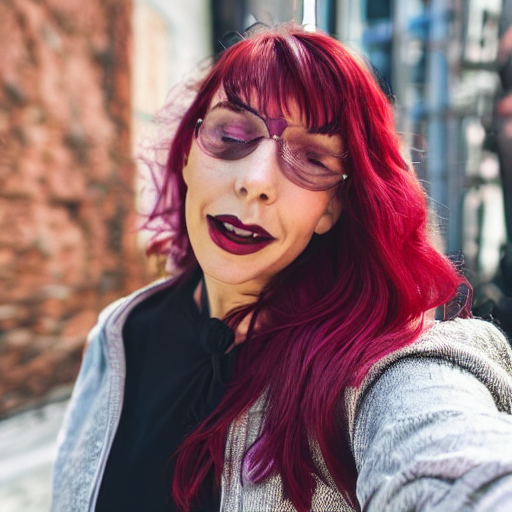

In [11]:
IMAGE_PATH = 'generated_image.jpg'
CAPTION_PATH = 'generated_caption.txt'

local_file_path = StableDiffusionTool().langchain.run(
    "Please create a selfie of a 26 year old woman with purple and red hair, shot on iphone"
)
im = Image.open(local_file_path)
display(im)

In [12]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo-1106", temperature=0, openai_api_key="")
memory = ConversationBufferMemory(memory_key="chat_history")
tools = [
    StableDiffusionTool().langchain,
    ImageCaptioningTool().langchain,
    StableDiffusionPromptGeneratorTool().langchain,
    TextToVideoTool().langchain,
]


agent = initialize_agent(
    tools, llm, memory=memory, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)
output = agent.run(
    input=(
        "Please create a black chiweenie riding a skateboard"
        "but improve my prompt prior to using an image generator."
        "Please caption the generated image and create a video for it using the improved prompt."
    )
)

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔
Loaded as API: https://gradio-client-demos-blip-2.hf.space ✔
Loaded as API: https://microsoft-promptist.hf.space ✔
Loaded as API: https://damo-vilab-modelscope-text-to-video-synthesis.hf.space ✔


> Entering new AgentExecutor chain...
I should first improve the prompt using the StableDiffusionPromptGenerator tool, then use the StableDiffusion tool to generate the image, use the ImageCaptioner to create a caption, and finally use the TextToVideo tool to create a video.

Action: StableDiffusionPromptGenerator
Action Input: "Create an image of a black chiweenie riding a skateboard"
Job Status: Status.STARTING eta: None

Job Status: Status.PROCESSING eta: None

Job Status: Status.PROCESSING eta: None

Observation: Create an image of a black chiweenie riding a skateboard, RPG Reference, Oil Painting, Trending on Artstation, octane render, Insanely Detailed, 8k, HD
Thought:The prompt has been improved with key words and phra

: 

In [ ]:

try:
    # After the 'output' variable is obtained
    generated_image_path = output["tools"][0]["output"]["path"]
    generated_caption = output["tools"][1]["output"]["caption"]

    # Save the generated image
    generated_image = Image.open(generated_image_path)
    generated_image.save("generated_image.jpg")

    # Save the generated caption
    with open("generated_caption.txt", "w") as f:
        f.write(generated_caption)
        print(generated_caption)

finally:
    # Close the generated image
    if generated_image:
        generated_image.close()

NameError: name 'generated_image' is not defined